In [6]:
import os
import numpy as np
import pandas as pd

# 设定utils_data目录路径，假设脚本与utils_data在同一目录下
utils_data_path = 'utils_data'
datasets = ["chameleon", "cornell", "deezer-europe", "pokec", "snap-patents", "squirrel", "texas", "wisconsin", "yelp-chi"]
models = ["GCN", "mlp"]

# 初始化空的DataFrame
accuracy_df = pd.DataFrame(index=models, columns=datasets)

# 遍历utils_data目录下的每个子文件夹
for subdir in os.listdir(utils_data_path):
    
    # 检查是否为文件夹
    if os.path.isdir(os.path.join(utils_data_path, subdir)):
        # 提取模型和数据集名称
        if len(subdir.split('_')) > 2:
            continue
        model_name, dataset_name = subdir.split('_')
        # 仅处理指定的模型和数据集
        if model_name in models and dataset_name in datasets:
            # 构建final_accuracy.npy文件的完整路径
            final_accuracy_path = os.path.join(utils_data_path, subdir, 'final_accuracy.npy')
            # 读取final_accuracy.npy文件
            final_accuracy = np.load(final_accuracy_path)
            # 将读取到的精度数据存储到DataFrame中
            accuracy_df.at[model_name, dataset_name] = final_accuracy.item()  # Assuming it's a single number

# 输出结果
print(accuracy_df)


    chameleon cornell deezer-europe pokec snap-patents squirrel texas  \
GCN       NaN     NaN           NaN   NaN          NaN      NaN   NaN   
mlp       NaN     NaN           NaN   NaN          NaN      NaN   NaN   

    wisconsin yelp-chi  
GCN       NaN      NaN  
mlp       NaN      NaN  


In [ ]:
import numpy as np 
import os 
utils_data_pt = './utils_data/1stage_ourModel_twitch-e_True'
loss_list = np.load(os.path.join(utils_data_pt, 'loss.npy'))
# acc_list = np.load(os.path.join(utils_data_pt, 'acc.npy'))
val_acc_list = np.load(os.path.join(utils_data_pt, 'val_acc.npy'))
add_num_list = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
pseudo_loss_list = np.load(os.path.join(utils_data_pt, 'pseudo_loss.npy'))
final_acc = np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))
pseudolabel_num = np.load(os.path.join(utils_data_pt, 'pseudolabel_num.npy'))
print(f'Final_accuracy:{final_acc[0]}')

In [4]:
import numpy as np 
np.sum(np.array([0,0,0,1]) == 1)

1

In [ ]:
import matplotlib.pyplot as plt
lines = []
fig, ax1 = plt.subplots()
lines.append(ax1.plot(np.arange(len(loss_list)), loss_list[:,0], label='groudtruth_loss')[0])
lines.append(ax1.plot(np.arange(len(loss_list)), loss_list[:,1], label='autoencoder_loss')[0])
lines.append(ax1.plot(np.arange(len(pseudo_loss_list)), pseudo_loss_list, label='pseudo_loss')[0])
# ax1.legend()

# ax2 = ax1.twinx()
# lines.append(ax2.plot(np.arange(len(pseudolabel_num)), pseudolabel_num, label='pseudolabel_num', color='black')[0])
# ax2.legend()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

In [ ]:
fig, ax1 = plt.subplots()
lines.append(ax1.plot(np.arange(len(loss_list)), val_acc_list, label='val_acc')[0])
lines.append(ax1.plot(np.arange(len(acc_list)), acc_list, label='accuracy')[0])
ax1.legend()

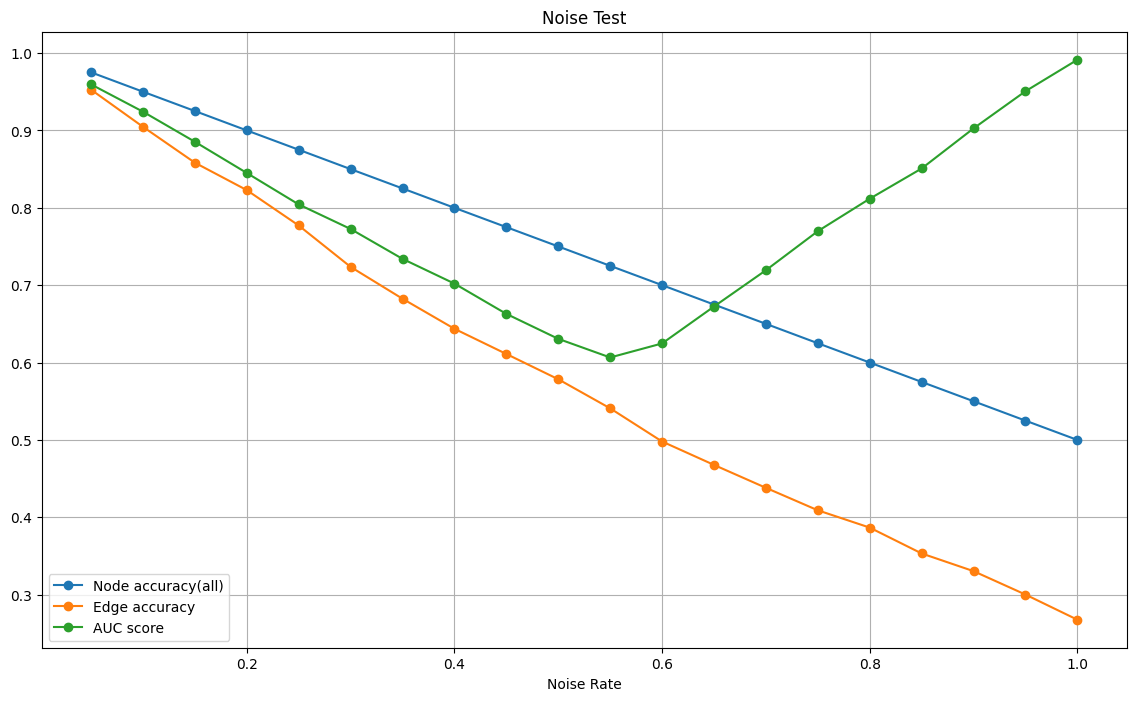

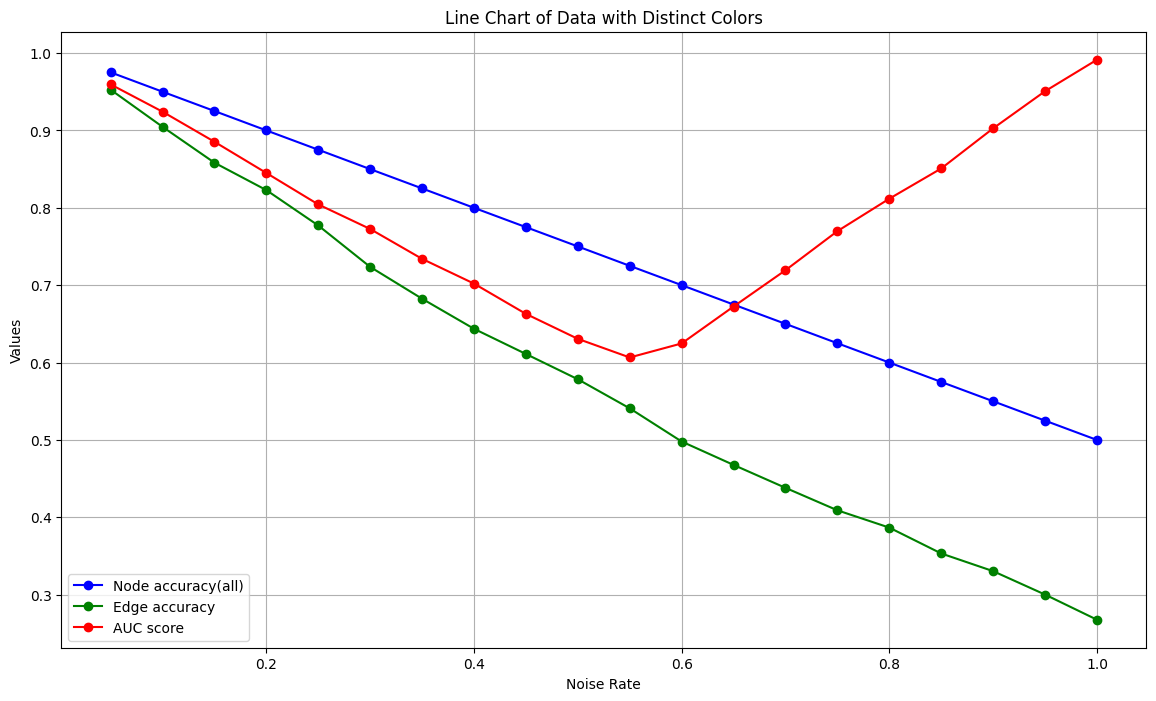

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Provided data
data = {
    "noise_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
    # "node_labels_pseudo_acc": [0.7829670310020447] * 20,
    "Node accuracy(all)": [0.9750474095344543, 0.9499894976615906, 0.9250368475914001, 0.8999789357185364, 0.8750263452529907, 
                                            0.849968433380127, 0.8250158429145813, 0.7999579310417175, 0.7750052809715271, 0.7500526905059814, 
                                            0.7249947786331177, 0.7000421285629272, 0.6749842166900635, 0.6500316262245178, 0.624973714351654, 
                                            0.6000210642814636, 0.5749631524085999, 0.5500105619430542, 0.5249526500701904, 0.5],
    "Edge accuracy": [0.9526439905166626, 0.9046480655670166, 0.8582585453987122, 0.8228394985198975, 0.7771291136741638, 
                 0.7236283421516418, 0.6824889779090881, 0.6436482071876526, 0.6111024022102356, 0.5784390568733215, 
                 0.5408520102500916, 0.4979887306690216, 0.4677480459213257, 0.43813422322273254, 0.40909504890441895, 
                 0.3867230713367462, 0.3533283770084381, 0.330466628074646, 0.30020633339881897, 0.2677127718925476],
    "AUC score": [0.9594590770440627, 0.924192145461478, 0.8853119116841026, 0.8449847186807425, 0.8043484736553632, 
                              0.7725980327907919, 0.7340093504992493, 0.7020213491647405, 0.6629091401949336, 0.6306671949098015, 
                              0.6065823612468126, 0.624708820866001, 0.672411186640612, 0.7193074106951363, 0.7698053940376045, 
                              0.8117255081857826, 0.850787449658032, 0.902612494936015, 0.9506142315849677, 0.9913253193289326]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting the data using line plots
plt.figure(figsize=(14, 8))

# Loop through the columns to plot them, except the first one which is for the x-axis
for column in df.columns[1:]:
    plt.plot(df["noise_rate"], df[column], marker='o', label=column)

plt.title('Noise Test')
plt.xlabel('Noise Rate')
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()


# Plotting the data with distinct colors for each line
colors = ['blue', 'green', 'red', 'purple']  # Colors for the lines

plt.figure(figsize=(14, 8))

# Loop through the columns to plot them with different colors, except the first one which is for the x-axis
for i, column in enumerate(df.columns[1:]):
    plt.plot(df["noise_rate"], df[column], marker='o', color=colors[i], label=column)

plt.title('Line Chart of Data with Distinct Colors')
plt.xlabel('Noise Rate')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


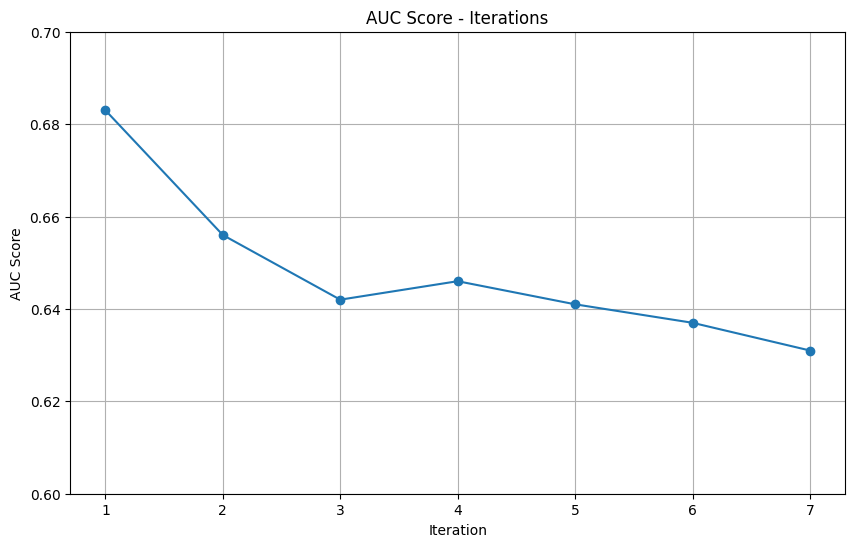

In [3]:
import matplotlib.pyplot as plt

# AUC scores provided
auc_scores = [0.683, 0.656, 0.642, 0.646, 0.641, 0.637, 0.631]

# Iterations (assuming each score corresponds to an iteration, starting from 1)
iterations = list(range(1, len(auc_scores) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, auc_scores, marker='o')
plt.title("AUC Score - Iterations")
plt.xlabel("Iteration")
plt.ylabel("AUC Score")
plt.grid(True)
plt.xticks(iterations)
plt.ylim(0.6, 0.7)  # Adjusting y-axis limits for better visualization
plt.show()


In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os 

utils_data_pt = './utils_data/3_stage_ourModel_twitch-e_True'
loss_list = np.load(os.path.join(utils_data_pt, 'loss.npy'))
metric_list = np.load(os.path.join(utils_data_pt, 'metric.npy'))
val_metric_list = np.load(os.path.join(utils_data_pt, 'val_metric.npy'))
add_num_list = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
test_metric_list = np.load(os.path.join(utils_data_pt, 'test_metric.npy'))
pseudo_loss_list = np.load(os.path.join(utils_data_pt, 'pseudo_loss.npy'))
final_acc = np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))
pseudolabel_num = np.load(os.path.join(utils_data_pt, 'pseudolabel_num.npy'))
best_val_metric_list = np.load(os.path.join(utils_data_pt, 'best_val_metric_list.npy'))
threshold_accuracy_list = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
edge_status_list = np.load(os.path.join(utils_data_pt, 'edge_status.npy'))
print(f'Final metric:{final_acc[0]}')

Final metric:0.6988840892728582


In [20]:
utils_data_pt = './utils_data/2_stage_ourModel_twitch-e_True'
threshold_accuracy_list_2 = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
add_num_list_2 = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
print(f"{np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))[0]}")

utils_data_pt = './utils_data/3_stage_inherit_ourModel_twitch-e_True'
threshold_accuracy_list_3_inherit = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
add_num_list_3_inherit = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
print(f"{np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))[0]}")

utils_data_pt = './utils_data/3_stage_non-inherit_ourModel_twitch-e_True'
threshold_accuracy_list_3_non_inherit = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
add_num_list_3_non_inherit = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
print(f"{np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))[0]}")

0.6965204274341283
0.6983351890854943
0.7009436760587104


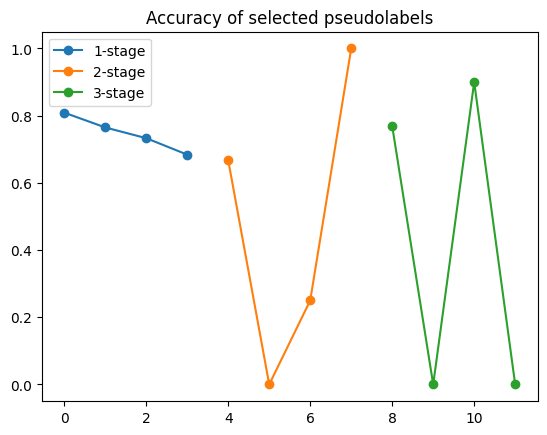

In [2]:
plt.title('Accuracy of selected pseudolabels')
# threshold_accuracy_list[np.where(np.isnan(threshold_accuracy_list))[0]] = 0
threshold_accuracy_list = [0.809, 0.765, 0.733, 0.684, 0.667, 0, 0.25, 1, 0.769, 0, 0.9, 0]
plt.plot(np.arange(len(threshold_accuracy_list[:4])), threshold_accuracy_list[:4], 'o-', label='1-stage')
plt.plot(np.arange(len(threshold_accuracy_list[4:8]))+4, threshold_accuracy_list[4:8], 'o-', label='2-stage')
plt.plot(np.arange(len(threshold_accuracy_list[8:12]))+8, threshold_accuracy_list[8:12], 'o-', label='3-stage')
# plt.plot(np.arange(len(threshold_accuracy_list_2)), threshold_accuracy_list_2, 'o-', label='2-stage')
# plt.plot(np.arange(len(threshold_accuracy_list_3_inherit)), threshold_accuracy_list_3_inherit, 'o-', label='3-stage-inherit')
# plt.plot(np.arange(len(threshold_accuracy_list_3_non_inherit)), threshold_accuracy_list_3_non_inherit, 'o-', label='3-stage-non-inhertit')
plt.legend()

In [3]:
edge_status_list

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2])

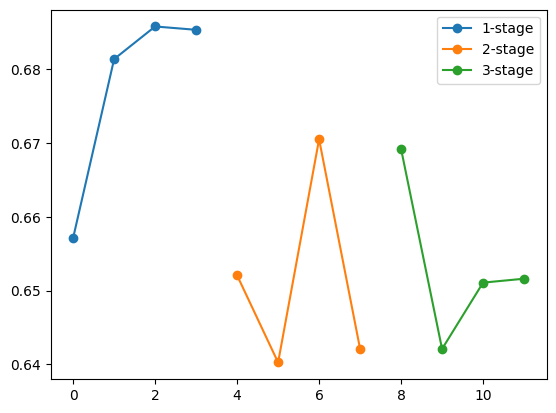

In [4]:
add_num_list = [256, 412, 303, 95, 42, 0, 4, 1, 13, 0, 10, 0]
plt.plot(np.arange(len(best_val_metric_list[:4])), best_val_metric_list[:4],  'o-', label='1-stage')
plt.plot(np.arange(len(best_val_metric_list[4:8]))+4, best_val_metric_list[4:8], 'o-', label='2-stage')
plt.plot(np.arange(len(best_val_metric_list[8:12]))+8, best_val_metric_list[8:12], 'o-', label='3-stage')
plt.legend()

[0.78104573 0.74147731 0.69543147 0.68421054 0.74025977 0.
 0.25       0.625      0.74248928 1.         0.69421482 1.        ]
[256, 412, 303, 95, 42, 0, 4, 1, 13, 0, 10, 0]


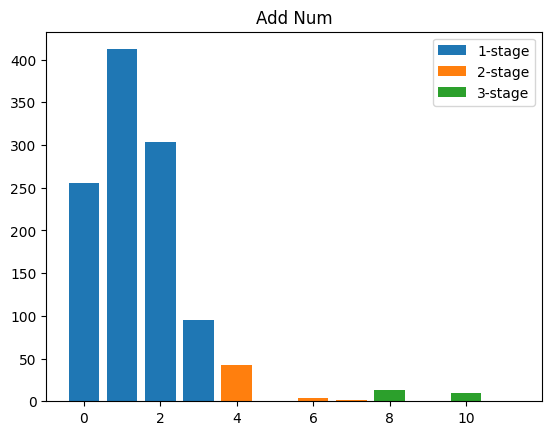

In [21]:
plt.title('Add Num')
add_num_list = [256, 412, 303, 95, 42, 0, 4, 1, 13, 0, 10, 0]
plt.bar(np.arange(len(add_num_list[:4])), add_num_list[:4],  label='1-stage')
plt.bar(np.arange(len(add_num_list[4:8]))+4, add_num_list[4:8],  label='2-stage')
plt.bar(np.arange(len(add_num_list[8:12]))+8, add_num_list[8:12],  label='3-stage')
plt.legend()
print(threshold_accuracy_list)
print(add_num_list)
# edge_status_list

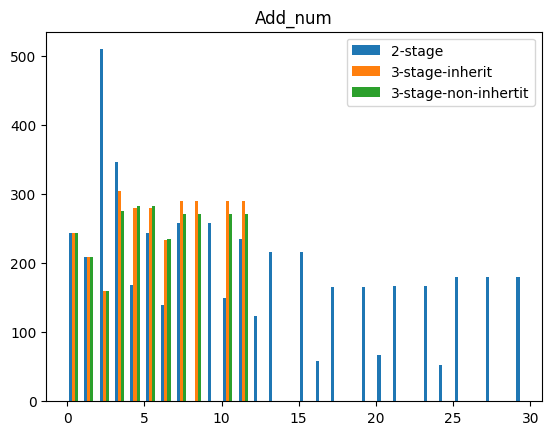

In [40]:
plt.title('Add_num')
width = 0.2
# plt.bar(np.arange(len(add_num_list[1:])), add_num_list[1:], width=width, label='1-stage')
plt.bar(np.arange(len(add_num_list_2[1:]))+width, add_num_list_2[1:], width=width, label='2-stage')
plt.bar(np.arange(len(add_num_list_3_inherit[1:]))+2*width, add_num_list_3_inherit[1:], width=width, label='3-stage-inherit')
plt.bar(np.arange(len(add_num_list_3_non_inherit[1:]))+3*width, add_num_list_3_non_inherit[1:], width=width, label='3-stage-non-inhertit')
plt.legend()

In [8]:
print(val_metric_list)

[0.5        0.5        0.5        ... 0.64696358 0.64676367 0.64661613]


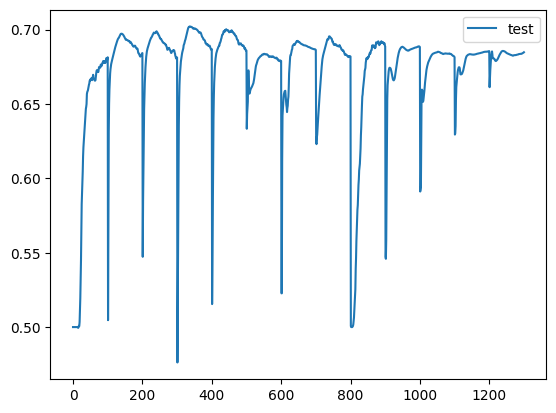

In [7]:
# plt.plot(np.arange(len(loss_list)), loss_list[:,0], label='groudtruth_loss')
# plt.plot(np.arange(len(loss_list)), loss_list[:,1], label='autoencoder_loss')
# plt.plot(np.arange(len(loss_list)), [0,]*101 + list(pseudo_loss_list), label='pseudo_loss')

# plt.plot(np.arange(len(loss_list)), val_metric_list, label='val')
plt.plot(np.arange(len(loss_list)), test_metric_list, label='test')

plt.legend()

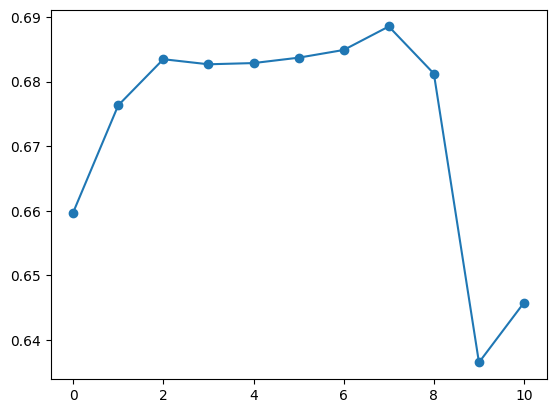

In [14]:
plt.plot(np.arange(len(best_val_metric_list)), best_val_metric_list, 'o-', label='best_val_metric')

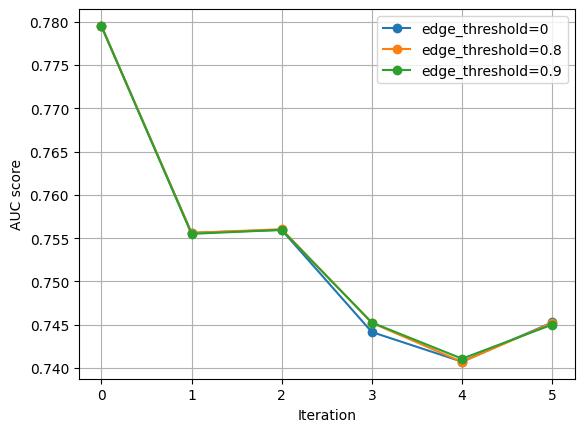

In [17]:
# 2.24 数据可视化
import numpy as np 
import os 
import matplotlib.pyplot as plt

A = np.load('utils_data/ourModel2_0_yelp-chi/best_val_metric_list.npy')
B = np.load('utils_data/ourModel2_0.8_yelp-chi/best_val_metric_list.npy')
C = np.load('utils_data/ourModel2_0.9_yelp-chi/best_val_metric_list.npy')
GCN_base = np.array([0.569,]*6)
plt.plot(A, 'o-', label="edge_threshold=0")
plt.plot(B, 'o-', label="edge_threshold=0.8")
plt.plot(C, 'o-', label="edge_threshold=0.9")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Iteration')
plt.grid(True)
plt.show()
# plt.plot(GCN_base, label="GCN", linestyle='--') 

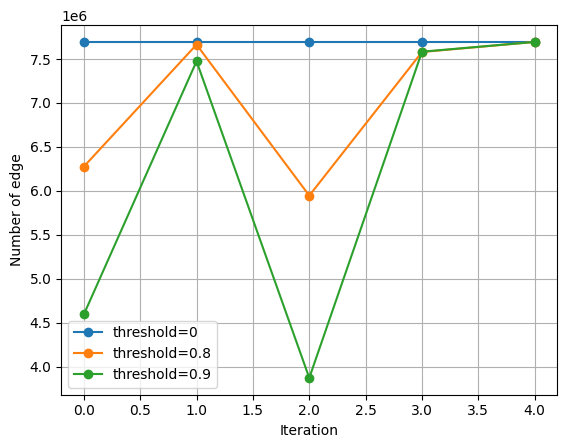

In [16]:
# 2.24 数据可视化
import numpy as np 
import os 
import matplotlib.pyplot as plt

A = np.load('utils_data/ourModel2_0_yelp-chi/n_edge_pseudolabel_list.npy')
B = np.load('utils_data/ourModel2_0.8_yelp-chi/n_edge_pseudolabel_list.npy')
C = np.load('utils_data/ourModel2_0.9_yelp-chi/n_edge_pseudolabel_list.npy')
GCN_base = np.array([0.569,]*6)
plt.plot(A, 'o-', label="threshold=0")
plt.plot(B, 'o-', label="threshold=0.8")
plt.plot(C, 'o-', label="threshold=0.9")
plt.legend()
plt.ylabel('Number of edge')
plt.xlabel('Iteration')
plt.grid(True)
plt.show()
# plt.plot(GCN_base, label="GCN", linestyle='--') 

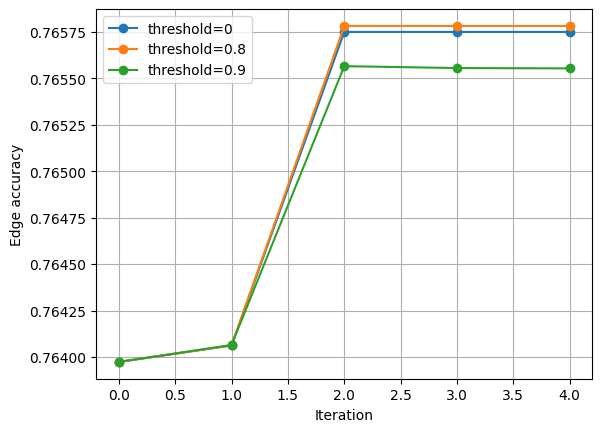

In [19]:
# 2.24 数据可视化
import numpy as np 
import os 
import matplotlib.pyplot as plt

A = np.load('utils_data/ourModel2_0_yelp-chi/edge_acc_list.npy')
B = np.load('utils_data/ourModel2_0.8_yelp-chi/edge_acc_list.npy')
C = np.load('utils_data/ourModel2_0.9_yelp-chi/edge_acc_list.npy')
GCN_base = np.array([0.569,]*6)
plt.plot(A, 'o-', label="threshold=0")
plt.plot(B, 'o-', label="threshold=0.8")
plt.plot(C, 'o-', label="threshold=0.9")
plt.legend()
plt.ylabel('Edge accuracy')
plt.xlabel('Iteration')
plt.grid(True)
plt.show()
# plt.plot(GCN_base, label="GCN", linestyle='--') 

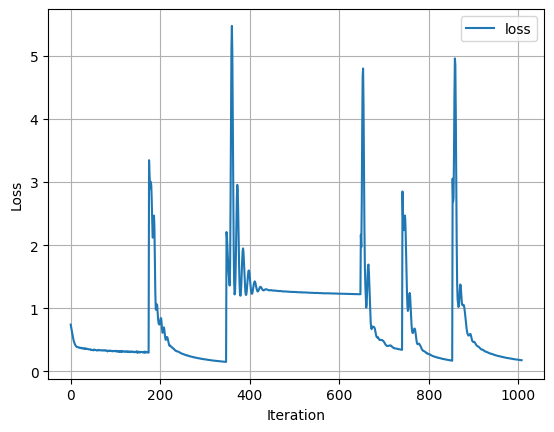

In [31]:
# 2.24 数据可视化
import numpy as np 
import os 
import matplotlib.pyplot as plt

A = np.load('utils_data/ourModel2_0.8_yelp-chi/loss.npy')
# B = np.load('utils_data/ourModel2_0.8_yelp-chi/metric.npy')
# B = np.load('utils_data/ourModel2_0.8_yelp-chi/n_edge_pseudolabel_list.npy')
# C = np.load('utils_data/ourModel2_0.8_yelp-chi/n_edge_pseudolabel_list.npy')
# GCN_base = np.array([0.569,]*6)
plt.plot(A[:,0]+A[:,1], label="loss")
# plt.plot(B, label="AUC score")
# plt.plot(B, 'o-', label="threshold=0.8")
# plt.plot(C, 'o-', label="threshold=0.9")
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.grid(True)
plt.show()
# plt.plot(GCN_base, label="GCN", linestyle='--') 

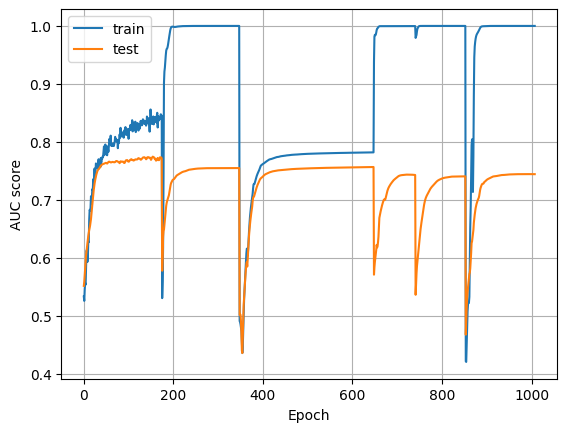

In [30]:
# 2.24 数据可视化
import numpy as np 
import os 
import matplotlib.pyplot as plt

A = np.load('utils_data/ourModel2_0.8_yelp-chi/metric.npy')
B = np.load('utils_data/ourModel2_0.8_yelp-chi/test_metric.npy')
# GCN_base = np.array([0.569,]*6)
plt.plot(A, label="train")
plt.plot(B, label="test")
# plt.plot(B, label="AUC score")
# plt.plot(B, 'o-', label="threshold=0.8")
# plt.plot(C, 'o-', label="threshold=0.9")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()
# plt.plot(GCN_base, label="GCN", linestyle='--') 

In [41]:
# 2.24 数据可视化
import numpy as np 
import os 
import matplotlib.pyplot as plt
from utils import cal_change_ratio

y = np.load('utils_data/ourModel2_0.8_yelp-chi/y.npy')
A = np.load('utils_data/ourModel2_0.8_yelp-chi/edge_label_list.npy')

for i in range(len(A)-1):
    print(cal_change_ratio(y, A[i], A[i+1]))

(1.0, 0.0, 1.0, 0.0)
(0.9824835153772588, 0.017516484622741246, 0.9824835153772588, 0.017516484622741246)
(0.9998239215193058, 0.0001760784806942306, 0.9998239215193058, 0.0001760784806942306)
(0.9999245320990139, 7.546790098611478e-05, 0.9999245320990139, 7.546790098611478e-05)
(0.9999748459313293, 2.5154068670651952e-05, 0.9999748459313293, 2.5154068670651952e-05)


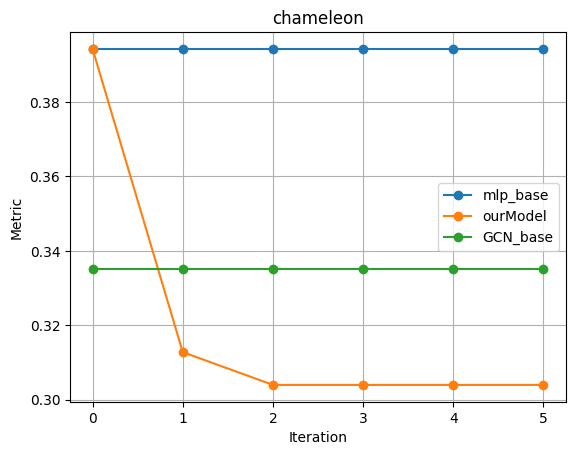

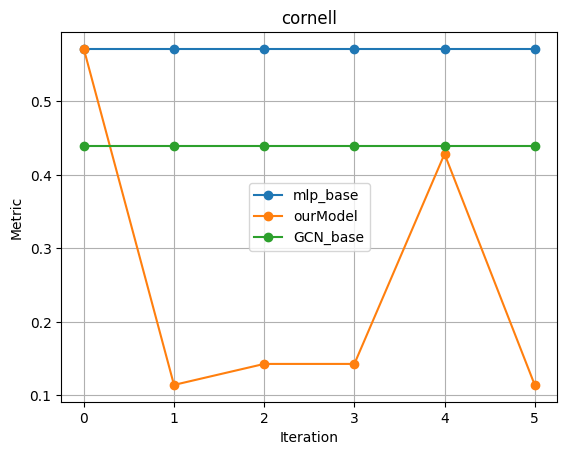

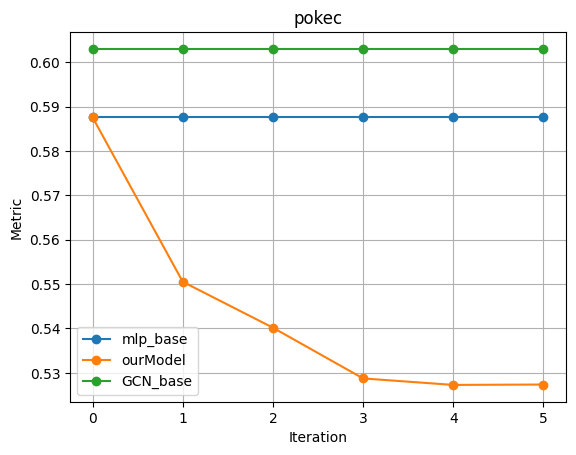

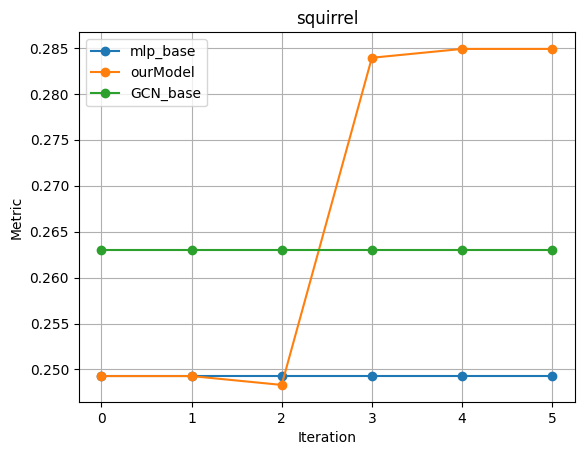

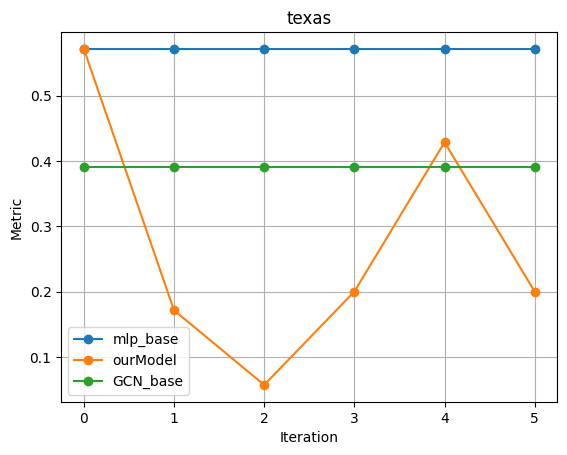

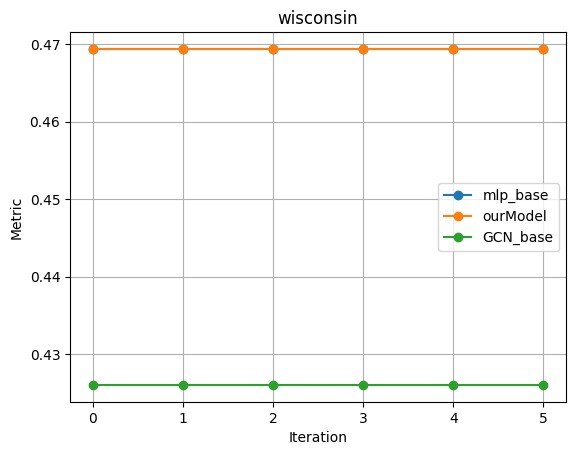

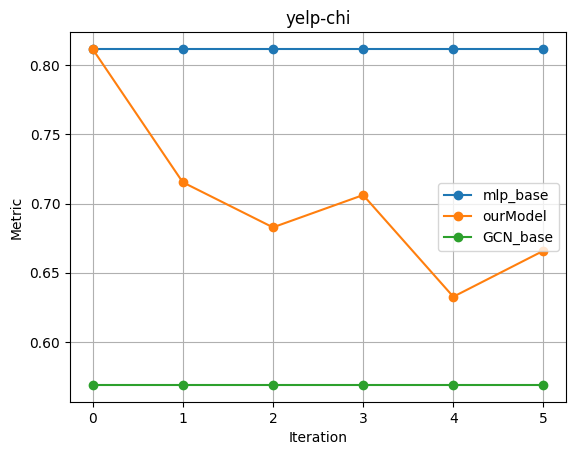

In [40]:
# 3.9 数据可视化
import numpy as np 
import os 
import matplotlib.pyplot as plt

datasets = ['chameleon', 'cornell', 'pokec', 'squirrel', 'texas', 'wisconsin', 'yelp-chi']
GCN_baseline = [0.335, 0.439, 0.603, 0.263, 0.39, 0.426, 0.569]


for i, dataset in enumerate(datasets):
    B = np.load(f'utils_data/ourModel_0.8_{dataset}/best_val_metric_list.npy')
    C = np.load(f'utils_data/ourModel_decoupled_{dataset}/best_val_metric_list.npy')
    mlp_base = [B[0]] * len(B)
    GCN_base = [GCN_baseline[i]] * len(B)
    # plt.plot(A, 'o-', label="edge_threshold=0")
    plt.plot(mlp_base, 'o-', label='mlp_base')
    plt.plot(B, 'o-', label='ourModel')
    plt.plot(GCN_base, 'o-', label='GCN_base')
    # plt.plot(C, 'o-', label="edge_threshold=0.9")
    plt.legend()
    plt.title(f'{dataset}')
    plt.ylabel('Metric')
    plt.xlabel('Iteration')
    plt.grid(True)
    plt.savefig(f'{dataset}_1.png')
    plt.show()
    # plt.plot(GCN_base, label="GCN", linestyle='--') 

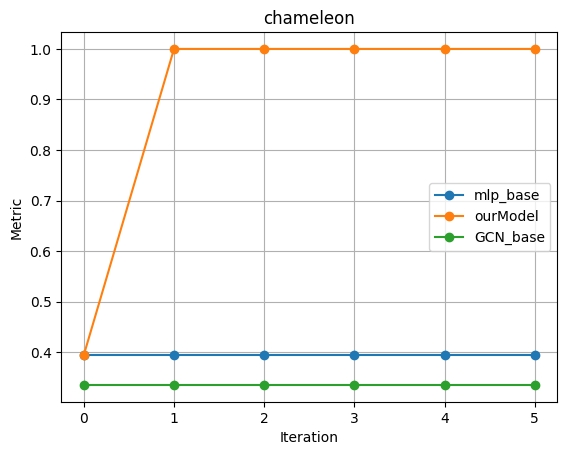

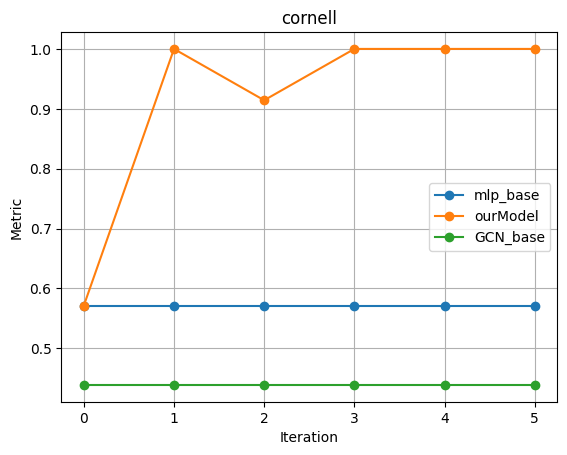

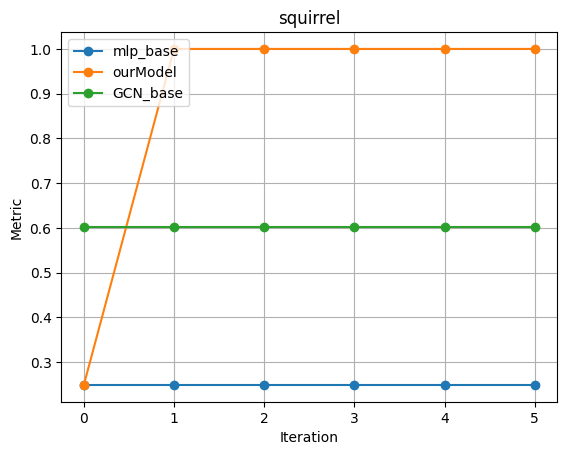

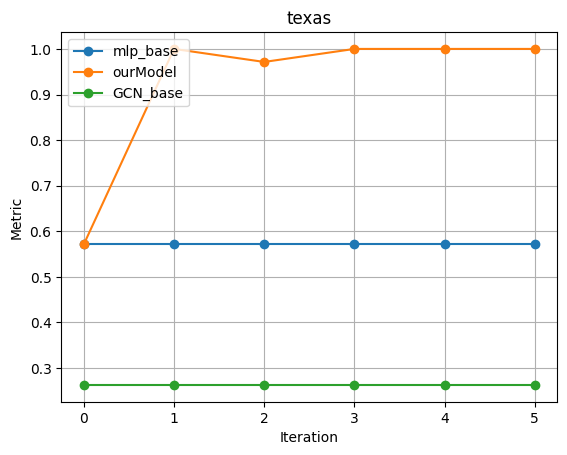

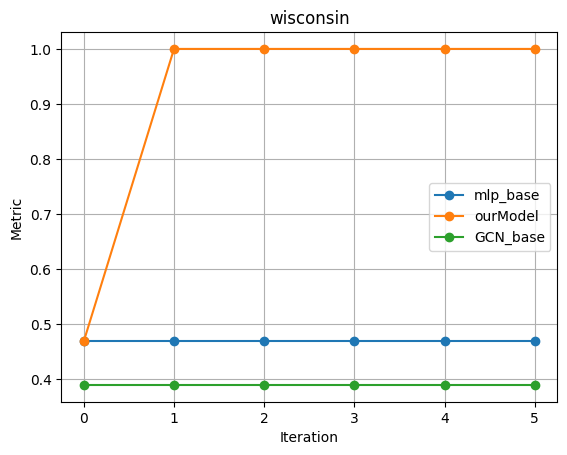

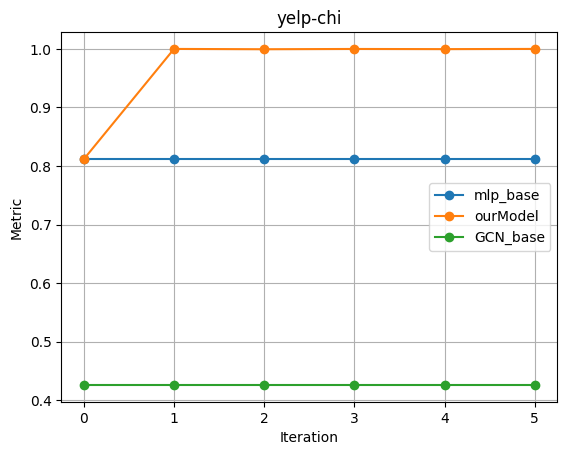

In [41]:
# 3.9 数据可视化
import numpy as np 
import os 
import matplotlib.pyplot as plt

datasets = ['chameleon', 'cornell', 'squirrel', 'texas', 'wisconsin', 'yelp-chi']
GCN_baseline = [0.335, 0.439, 0.603, 0.263, 0.39, 0.426, 0.569]


for i, dataset in enumerate(datasets):
    B = np.load(f'utils_data/ourModel_upperBound_{dataset}/best_val_metric_list.npy')
    # C = np.load(f'utils_data/ourModel_decoupled_{dataset}/best_val_metric_list.npy')
    mlp_base = [B[0]] * len(B)
    GCN_base = [GCN_baseline[i]] * len(B)
    # plt.plot(A, 'o-', label="edge_threshold=0")
    plt.plot(mlp_base, 'o-', label='mlp_base')
    plt.plot(B, 'o-', label='ourModel')
    plt.plot(GCN_base, 'o-', label='GCN_base')
    # plt.plot(C, 'o-', label="edge_threshold=0.9")
    plt.legend()
    plt.title(f'{dataset}')
    plt.ylabel('Metric')
    plt.xlabel('Iteration')
    plt.grid(True)
    plt.savefig(f'{dataset}_upperBound.png')
    plt.show()
    # plt.plot(GCN_base, label="GCN", linestyle='--') 

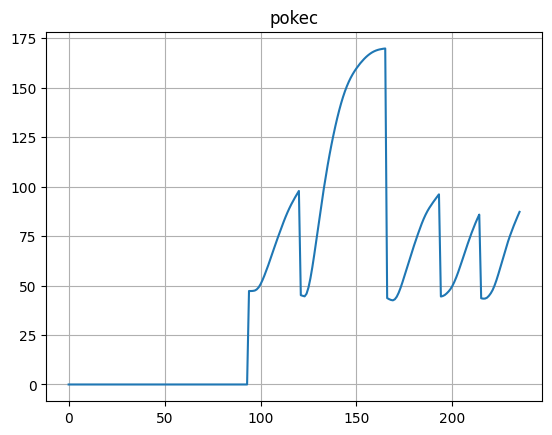

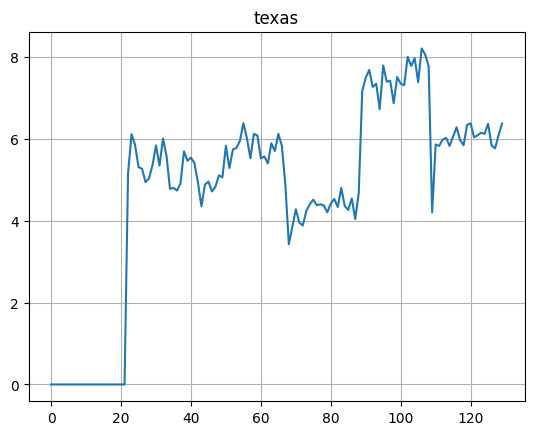

In [36]:
A = np.load(f'utils_data/ourModel_decoupled_{dataset}/loss.npy')
B = np.load(f'utils_data/ourModel_decoupled_texas/loss.npy')
plt.plot(A[:,1])
plt.title('pokec')
plt.grid()
plt.show()
plt.plot(B[:,1])
plt.title('texas')
plt.grid()
plt.show()


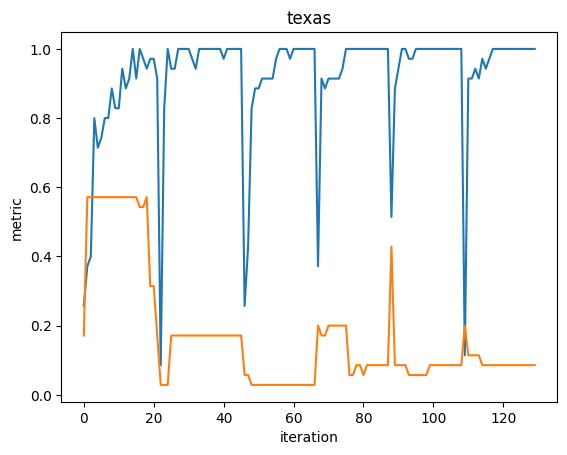

In [43]:
B = np.load(f'utils_data/ourModel_decoupled_texas/metric.npy')
C = np.load(f'utils_data/ourModel_decoupled_texas/val_metric.npy')
plt.plot(B, label='train')
plt.plot(C, label='val')
plt.ylabel('metric')
plt.xlabel('iteration')
plt.title('texas')
plt.show()

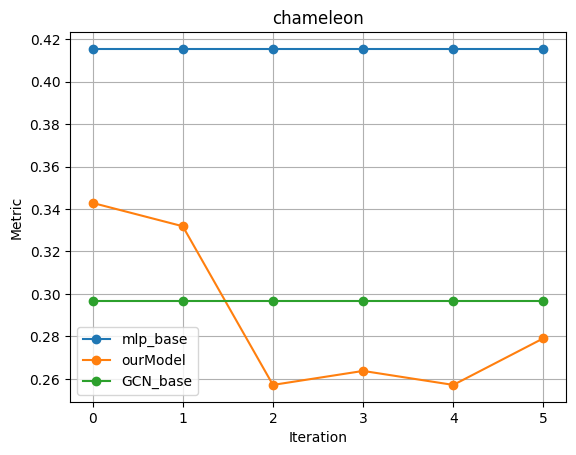

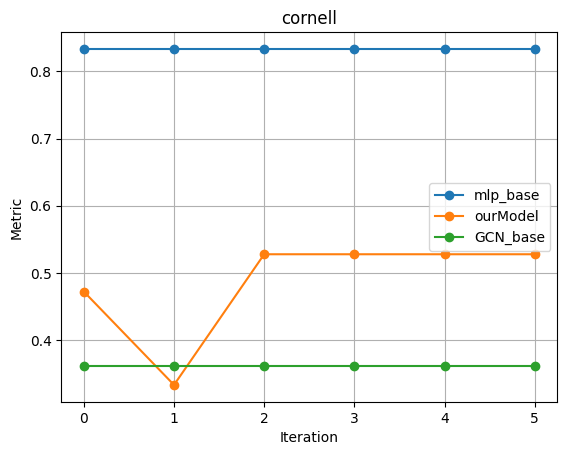

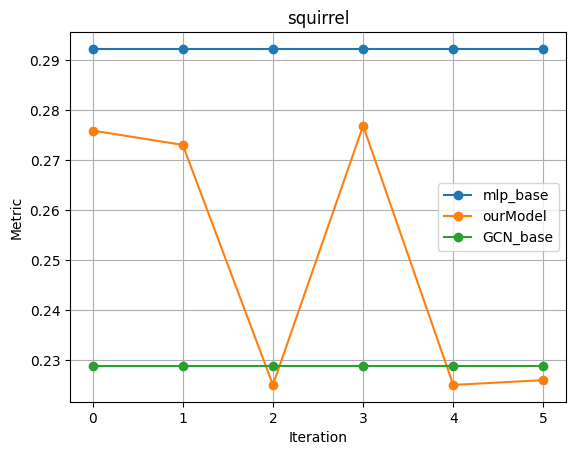

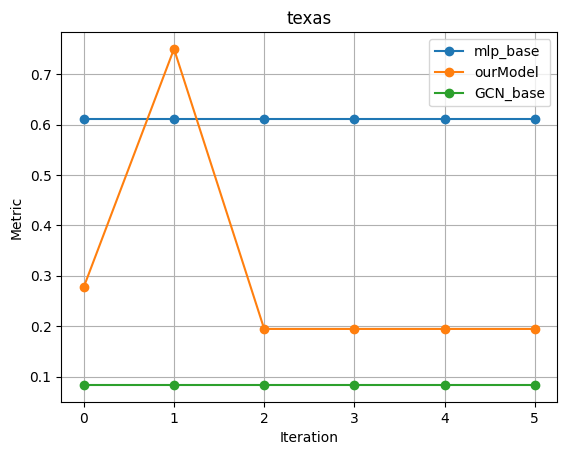

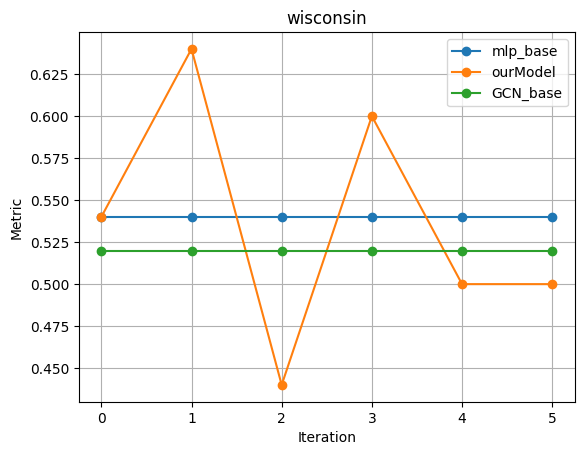

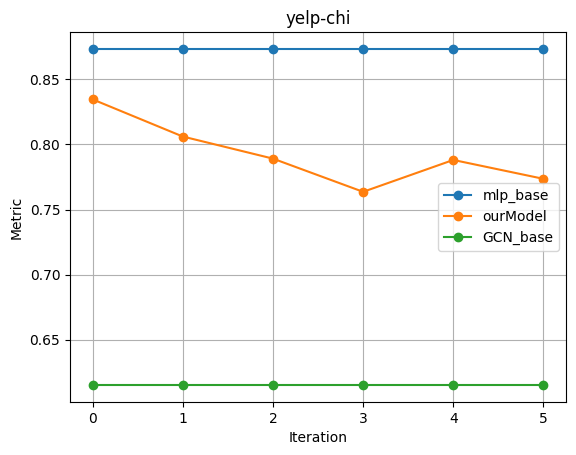

In [16]:
# 3.16 数据可视化
import numpy as np 
import os 
import matplotlib.pyplot as plt

datasets = ['yelp-chi', 'texas', 'wisconsin', 'chameleon', 'squirrel', 'cornell']

# 继续探索下为什么训练数据少反而效果好
# 展示train 0.4 下的结果，表明在训练数据少的时候效果好
# 记录change ratio，表明仍有改进空间
# 画图展示训练流程，说明不能交叉的原因，目前只能这样？

tail = 114

for i, dataset in enumerate(datasets):
    B = np.load(f'utils_data/ourModel_{dataset}_{tail}/best_val_metric_list.npy')
    mlp_base = list(np.load(f'utils_data/mlp_{dataset}_{tail}/best_val_metric_list.npy')) * len(B)
    GCN_base = list(np.load(f'utils_data/GCN_{dataset}_{tail}/best_val_metric_list.npy')) * len(B)
    plt.plot(mlp_base, 'o-', label='mlp_base')
    plt.plot(B, 'o-', label='ourModel')
    plt.plot(GCN_base, 'o-', label='GCN_base')
    plt.legend()
    plt.title(f'{dataset}')
    plt.ylabel('Metric')
    plt.xlabel('Iteration')
    plt.grid(True)
    plt.savefig(f'imgs/{dataset}_{tail}.png')
    plt.show()
    
    # break

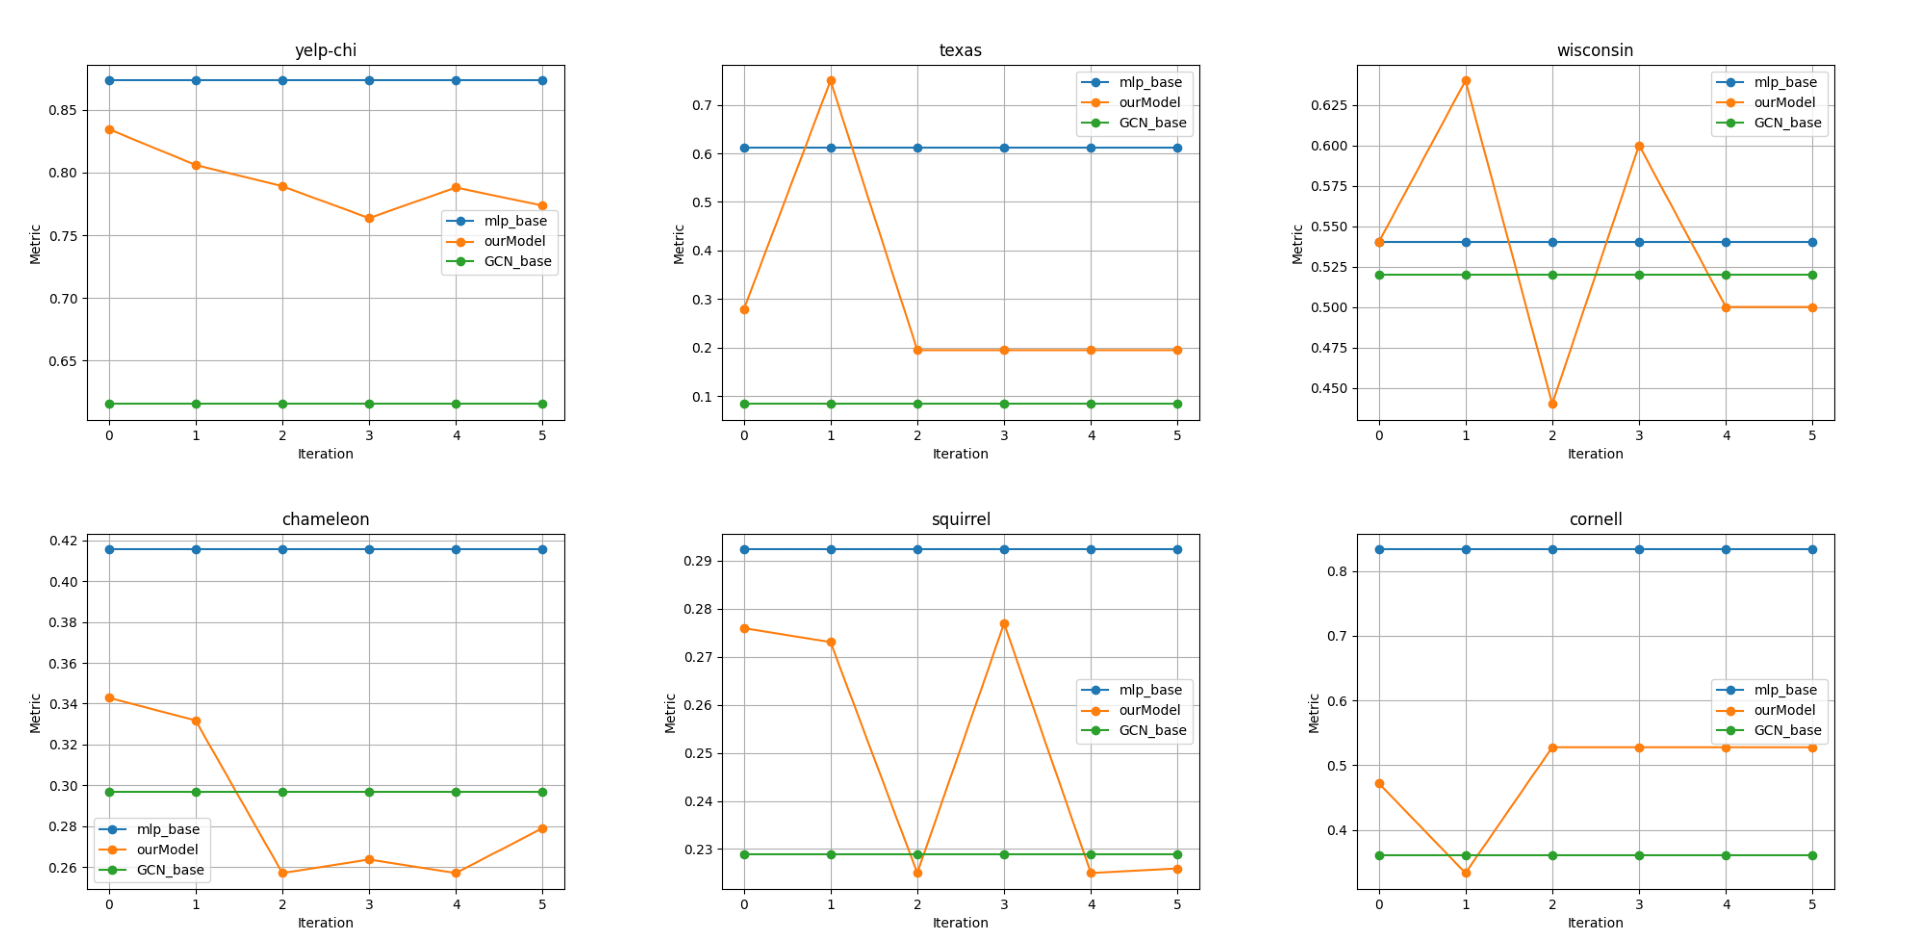

In [28]:
# 3.16 图片合成
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 

# tail = 114

image_list = [f'{dataset}_{tail}.png' for dataset in datasets]
# image_list = ['chameleon_train_0.4.png', ''
#               'texas_train_0.4.png',
#  'cornell_train_0.4.png',
#  'squirrel_train_0.4.png',
#  'wisconsin_train_0.4.png' ]

img_sample = plt.imread(os.path.join('imgs', image_list[0]))
(max_height, max_width, _) = img_sample.shape

images = [mpimg.imread(os.path.join('imgs', path)) for path in image_list]


# Set up the figure size to avoid compression
plt.figure(figsize=(max_width * 3 / 100, max_height * 2 / 100))

# Plot images in a 2x3 grid
for i, image in enumerate(images):
    plt.subplot(2, 3, i+1)  # Rows, columns, index
    plt.imshow(image)
    plt.axis('off')  # Hide axes

plt.tight_layout()


plt.show()



In [18]:
image_list = os.listdir('imgs')

[name for name in image_list if name.split('.png')[0].endswith('0.4')]

['texas_train_0.4.png',
 'chameleon_train_0.4.png',
 'cornell_train_0.4.png',
 'wisconsin_train_0.4.png',
 'squirrel_train_0.4.png']

In [19]:
# 3.16 可视化
# 统计标签改变率
import numpy as np
from utils import cal_change_ratio
datasets = ['chameleon', 'cornell', 'yelp-chi', 'squirrel', 'texas', 'wisconsin']


for dataset_name in datasets:
    y = np.load(f'utils_data/ourModel_{dataset_name}/y.npy')
    A = np.load(f'utils_data/ourModel_{dataset_name}/edge_label_list.npy')
    w_r_list = []
    print(dataset_name)
    for i in range(len(A)-1):
        res = cal_change_ratio(y, A[i], A[i+1])
        # w_r_list.append(res[2])
        print(res)        
    # plt.plot(w_r_list, 'o-')
    # # plt.legend()
    # plt.title(f'{dataset_name}')
    # plt.ylabel('W_R_ratio')
    # plt.xlabel('Iteration')
    # plt.grid(True)
    # plt.savefig(f'{dataset}_ratio.png')
    # plt.show()


chameleon
{'r_r': 0.7001209189842805, 'r_r_n': 579, 'r_w': 0.2998790810157195, 'r_w_n': 248, 'w_r': 0.24413793103448275, 'w_r_n': 354, 'w_w': 0.7558620689655172, 'w_w_n': 1096}
{'r_r': 0.6312968917470525, 'r_r_n': 589, 'r_w': 0.3687031082529475, 'r_w_n': 344, 'w_r': 0.16294642857142858, 'w_r_n': 219, 'w_w': 0.8370535714285714, 'w_w_n': 1125}
{'r_r': 0.8824257425742574, 'r_r_n': 713, 'r_w': 0.11757425742574257, 'r_w_n': 95, 'w_r': 0.08441116405718176, 'w_r_n': 124, 'w_w': 0.9155888359428183, 'w_w_n': 1345}
{'r_r': 0.6917562724014337, 'r_r_n': 579, 'r_w': 0.30824372759856633, 'r_w_n': 258, 'w_r': 0.20694444444444443, 'w_r_n': 298, 'w_w': 0.7930555555555556, 'w_w_n': 1142}
{'r_r': 0.9714937286202965, 'r_r_n': 852, 'r_w': 0.02850627137970352, 'r_w_n': 25, 'w_r': 0.0035714285714285713, 'w_r_n': 5, 'w_w': 0.9964285714285714, 'w_w_n': 1395}
cornell
{'r_r': 1.0, 'r_r_n': 25, 'r_w': 0.0, 'r_w_n': 0, 'w_r': 0.15822784810126583, 'w_r_n': 25, 'w_w': 0.8417721518987342, 'w_w_n': 133}
{'r_r': 0.52, 